## Framing the Problem
This project will be used to compliment my personal, manual investment analysis workflow. The outputs from this project will be an additional source of data that I can use to make decisions regarding my investments.

### Model
This will be a supervised regression model. It will be using numerous input features and can thus be considered a multiple regression problem. It will also be predicting a single value, and is thus a univariate regression problem. The model will be an offline model that is trained first before being saved locally and then used to make predictions. The model and dataset are small enough such that training can be repeated easily with negligible time consequences.

### Data
The data to be used is found in the "NYSE_dataset.parquet" file. The dataset card can be seen in the root directory of this project. The following pieces of information were extracted from the dataset card and presented below in white before being addressed in red. 

1. Dataset shifts: This dataset holds data dating from the 1980s all the way to the present day. Keep in mind that the market dynamics might have changed over time, leading to possible dataset shifts. To account for these shifts, consider dividing the dataset into a training set and a test set using a time-based split. This will ensure that the model is trained on data that is representative of the time period it will be predicting on. One could also consider performing stationarity tests on the time series data. If requred, consider making use of techniques to make the time series data stationary.

2. Leakage: The columns 'priceRatioRelativeToS&P_1Q', 'priceRatioRelativeToS&P_2Q', 'priceRatioRelativeToS&P_3Q', and 'priceRatioRelativeToS&P_4Q' can be considered as labels, indicating future relative price increases of the stock versus the S&P500. To prevent leakage, ensure that these columns are not used to calculate any other features and that they are not present as input features.

3. Correlated features: The dataset was built in a greedy manner by keeping as many features as possible, meaning that there may be many features that are highly correlated with each other. To prevent overfitting and reduced model performance, perform feature selection or dimensionality reduction techniques to reduce the number of features in the dataset.

4. Missing values: The dataset is completely raw and has not been processed. As such, there will certainly be NaN values that must be handled. 

5. Data types: The only columns in the dataset that are not numeric are "date", "start_date" and "period". All others are either float64 or int64.

6. Outliers: The dataset is completely raw and has not been processed. As such, there are likely to be outliers.

7. Scaling: The dataset is completely raw and has not been processed. As such ll data is unscaled.

### Performance Measure
There are a whole host of performance measures that can be used in regression tasks. The most common candidates are briefly summarized below.
#### 1. Mean Squared Error (MSE)
- **Strengths**: MSE is widely used, easy to interpret and differentiable. It is a well-behaved loss function, and a small change in MSE is easily detected.
- **Weaknesses**: MSE is sensitive to outliers and does not punish large errors as severely as some other metrics.

#### 2. Root Mean Squared Error (RMSE)
  This uses the square of the difference between the two vectors and is thus an *l<sub>2</sub> norm*, also known as the *Euclidean norm*.
- **Strengths**: RMSE is also widely used, and it has the same interpretation as MSE but on the same scale as the target variable. It is easy to interpret and differentiable.
- **Weaknesses**: Like MSE, RMSE is sensitive to outliers and does not punish large errors as severely as some other metrics.

#### 3. Mean Absolute Error (MAE)
  This uses the difference between the two vectors and is thus an *l<sub>1</sub> norm*, also known as the *Manhattan norm*.
- **Strengths**: MAE is less sensitive to outliers than MSE and RMSE, and it punishes large errors more severely.
- **Weaknesses**: MAE is not differentiable at zero, which can be problematic in some optimization algorithms.

#### 4. R-Squared (R2)
- **Strengths**: R2 provides a measure of how well the model fits the data, and it is easy to interpret. It can be used to compare different models on the same data.
- **Weaknesses**: R2 can be misleading when the number of predictors is large, and it does not provide any information on the goodness of fit.

#### 5. Mean Absolute Percentage Error (MAPE)
- **Strengths**: MAPE expresses the prediction error as a percentage of the actual value, which can be useful when comparing models on datasets with different scales. It is also easy to interpret.
- **Weaknesses**: MAPE is undefined when the actual value is zero and can be heavily influenced by outliers.

#### 6. Symmetric Mean Absolute Percentage Error (SMAPE)
- **Strengths**: SMAPE is similar to MAPE but symmetric, meaning that it is equally sensitive to under- and over-predictions.
- **Weaknesses**: SMAPE can be undefined or heavily influenced by small values.

#### 7. Coefficient of Determination (COD)
- **Strengths**: COD is similar to R2, but it provides a measure of the proportion of variance in the target variable explained by the model.
- **Weaknesses**: COD can be misleading when the number of predictors is large, and it does not provide any information on the goodness of fit.

#### 8. Median Absolute Error (MedAE)
- **Strengths**: MedAE is less sensitive to outliers than MSE and RMSE, and it punishes large errors more severely. It is also more robust than MAE because it uses the median instead of the mean.
- **Weaknesses**: MedAE is not differentiable at zero, which can be problematic in some optimization algorithms.

#### 9. Mean Directional Accuracy (MDA)
- **Strengths**: MDA provides a measure of how well the model can predict the direction of the target variable, regardless of the magnitude of the prediction error.
- **Weaknesses**: MDA does not provide any information on the magnitude of the prediction error.

#### 10. Geometric Mean Absolute Error (GMAE)
- **Strengths**: GMAE is similar to MAE, but it uses the geometric mean instead of the arithmetic mean, which can be more suitable for datasets with skewed distributions.
- **Weaknesses**: GMAE is undefined when the actual value is zero or negative, and it is heavily influenced by

This initial pass over the data will make use of the RMSE, as defined below:
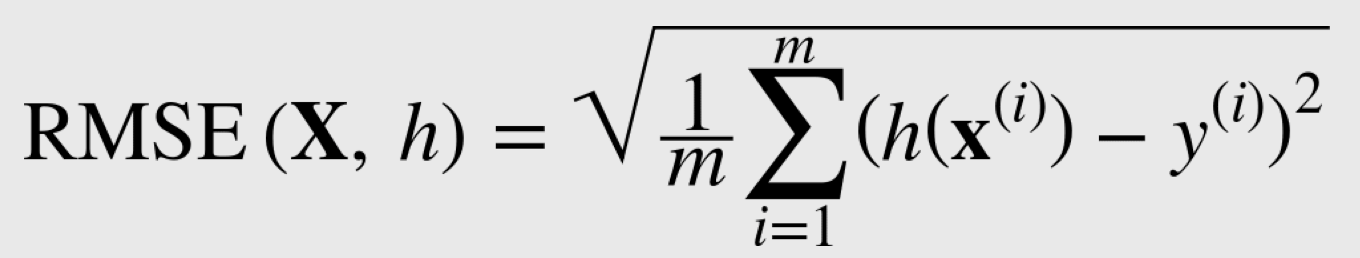
Where:
- m is the number of instances.
- x<sup>(i),</sup> is a vector of all input feature values for instance i.
- y<sup>(i),</sup> is the label for instance i.
- **X** is a matrix of all input features for all instances. 
- *h* is the systems prediction function, also called the *hypothesis*.
- RMSE(**X**, *h*) is the cost function measured on the input features **X** using hypothesis *h*.

An alternative form of the equation is shown below, where N is the total number of instances.
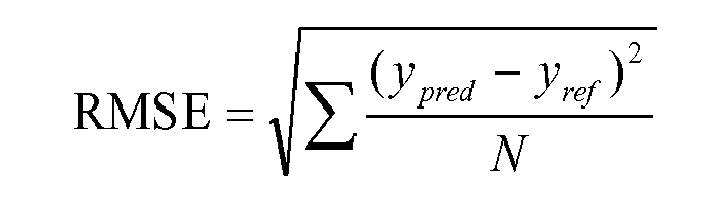

### Assumptions
Some **strong** assumptions will be made during this first pass through the data in order to simplify the initial workflow. This is a trade-off, as it is likely that the assumtions may negatively impact performance. It is however important that the assumptions are explicitly stated, such that they may be addressed directly in the future to determine their effect on performance.
- **Instance independence** 
    - It is assumed that each instance in the training data is independent from all the other instances, including those from the same company.
    - Inherently, this assumption is stating that the data is not time-series data. 
    - This simplifies the data processing as the entire dataset can now be shuffled without worrying about the order of the isntances.
    - This assumptis likely not to be true, since the results of a company in a quarter are very likely to have been affected by results in previous quarters. It is also possible that factors absent from the data, such as marketing and reputation, had an impacts on the data. 
- **Dataset Shifts**
    - It is assumed that the distributions in the data remain constant over time.
    - This assumption also inherently stating that the data is not time series data, since distribution shifts are often an inherent part of time series data due to factors such as seasonality, trends, and concept drift.
    - This further simplifies data processing and allows the data to be shuffled without having to worry about the timeperiod of the isntances.
    - This is almost certainly an untrue assumption. It assumes that typical company operations today are the same as they were back in the 1980's, and also completely neglects the presence of macroeconomic factors such as bull and bear markets.
- **Normality**
    - The distributions in the data are assumed to be normal.
    - While this should probably be a valid assumption, it can be invalidated via some statistical tests on the data and via some visualisations.
    - If the assumtion is not valid, then this will severely impact performance on models that explicitly rely on the statistics of the normal distribution, such as linear regression, Naive Bayes, parametric hypothesis tests and some clustering methods, such as Gaussian mixture models.
- **Homoscedasticity**
    - This is an important assumption in regression models and assumes that the model's error term does not depend on the predictor variables. Thus the error maintains a consistent variance throught the range of the independed variables.

 

In [1]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from preprocessing_tools import check_for_nan_columns, drop_nan_columns

## Exploratory Data Analysis, Cleaining & Pre-Processing

The below cell loads the data and looks at the head of the dataframe. 
- Note the large number of columns, 108 in this case. 
- The dataset card details that the majority of the columns are numeric. 
- The only non-numeric columns are "date" and "period".

#### Labels
The four last columns of the data are the labels. These are each "look-ahead" features that are the ratio of the increase in stock price to the increase in the price of the S&P500 index. The number before the "Q" represents the number of quarters into the future that the feature is looking.
- priceRatioRelativeToS&P_1Q
- priceRatioRelativeToS&P_2Q
- priceRatioRelativeToS&P_3Q
- priceRatioRelativeToS&P_4Q
- Example: if *priceRatioRelativeToS&P_1Q* = 0.95 then the stock price return was lagging the S&P500 return by 5%. So if the S&P500 increased 100%, the stock would have increased 95%.
- Example: if *priceRatioRelativeToS&P_3Q* = 1.5 then the stock price was leading the S&P500 return by 50%. Thus, if the S&P500 dropped 10%, the stock would have increased 35%.
- These are used as labels because the increase in stock price is irrelevant if it does not compare well to total market returns. \n
    
    - $Relative Price Ratio = \frac{\text{Relative Stock Return}}{\text{Relative S&P Return}}$
    
Note NAN values for the labels. The most recent instance cannot have a value for any of the 'priceRatioRelativeToS&P_xQ' since there are no future values with which to compare the most recent price, but any other instance for that company that is further than 1 quater away can have valid values. This explains why 'priceRatioRelativeToS&P_2Q' has two NAN values in the most recent instances, and so on.

In [2]:
raw_df = pd.read_parquet('NYSE_dataset.parquet')
raw_df.head()

,date,period,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,...,S&P500PriceHigh,S&P500PriceLow,snpPriceRatio_1Q,snpPriceRatio_2Q,snpPriceRatio_3Q,snpPriceRatio_4Q,priceRatioRelativeToS&P_1Q,priceRatioRelativeToS&P_2Q,priceRatioRelativeToS&P_3Q,priceRatioRelativeToS&P_4Q
TAP-Q4-2022,2022-12-31,Q4,0.101650,-2.941852,-37.638856,0.058196,0.058196,2.770083,0.177757,2.038527,...,4100.959961,3491.580078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAP-Q3-2022,2022-09-30,Q3,0.241594,0.000000,25.559642,0.068415,0.068415,2.422509,0.146246,2.027934,...,4325.279785,3610.399902,0.966226,NaN,NaN,NaN,0.977352,NaN,NaN,NaN
TAP-Q2-2022,2022-06-30,Q2,0.106678,-5.425121,-68.926841,0.115521,0.115521,2.037327,0.125800,2.048030,...,4603.069824,3636.870117,0.968170,0.935471,NaN,NaN,1.045461,1.021783,NaN,NaN
TAP-Q1-2022,2022-03-31,Q1,0.079887,0.489336,-96.158311,-0.016313,-0.016313,1.651473,0.100892,2.048619,...,4818.620117,4114.649902,0.920647,0.891343,0.861239,NaN,1.161207,1.213996,1.186502,NaN
TAP-Q4-2021,2021-12-31,Q4,0.094833,-1.920854,-35.850825,0.042428,0.042428,2.934622,0.175970,2.058493,...,4808.930176,4278.939941,0.972408,0.895245,0.866749,0.837476,1.125775,1.307258,1.366687,1.335734


In [3]:
raw_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 66627 entries, TAP-Q4-2022 to IVC-Q3-1985
Data columns (total 108 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    date                                    object 
 1    period                                  object 
 2    assetTurnover                           float64
 3    capitalExpenditureCoverageRatio         float64
 4    cashConversionCycle                     float64
 5    cashFlowCoverageRatios                  float64
 6    cashFlowToDebtRatio                     float64
 7    cashPerShare                            float64
 8    cashRatio                               float64
 9    companyEquityMultiplier                 float64
 10   currentRatio                            float64
 11   daysOfInventoryOutstanding              float64
 12   daysOfPayablesOutstanding               float64
 13   daysOfSalesOutstanding                  float64
 14   dividendP

Note how all data types are float64 except for "date" and "period".

Below we get a glimpse of the statistical features of the data, though we cannot see all features due to the large number of columns

In [4]:
raw_df.describe()

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,...,S&P500PriceHigh,S&P500PriceLow,snpPriceRatio_1Q,snpPriceRatio_2Q,snpPriceRatio_3Q,snpPriceRatio_4Q,priceRatioRelativeToS&P_1Q,priceRatioRelativeToS&P_2Q,priceRatioRelativeToS&P_3Q,priceRatioRelativeToS&P_4Q
count,66627.000000,66627.000000,4.467600e+04,6.507500e+04,6.507500e+04,55966.000000,66627.000000,66627.000000,6.662700e+04,6.319700e+04,...,66627.000000,66627.000000,66009.000000,65394.000000,64788.000000,64189.000000,66009.000000,65394.000000,64788.000000,64189.000000
mean,0.018845,-6.441979,8.450875e+01,-8.514182e+01,-8.514182e+01,322.532942,1.660594,10.660023,-2.257592e+04,9.831888e+01,...,1567.953695,1381.302079,1.021477,1.044824,1.069019,1.094261,1.003990,1.013372,1.023695,1.034927
std,52.756331,183.857490,7.846092e+03,2.215201e+04,2.215201e+04,4434.288071,134.812939,1370.541202,4.767032e+06,8.930901e+03,...,1117.216551,977.805495,0.060854,0.099231,0.129777,0.155266,0.155289,0.287321,0.395878,0.521533
min,-13567.842499,-18780.000000,-2.741550e+05,-5.650651e+06,-5.650651e+06,-3.839224,-2.291744,-7159.071001,-1.189378e+09,-2.269636e+04,...,192.169998,179.449997,0.725529,0.607571,0.587867,0.541849,0.106233,0.078548,0.044252,0.035015
25%,0.027859,-3.552239,1.730605e+01,0.000000e+00,0.000000e+00,0.385121,0.006443,1.415836,1.260512e-03,0.000000e+00,...,882.059998,684.440002,0.995418,0.999335,1.011485,1.021895,0.935053,0.895106,0.867468,0.842525
50%,0.128366,-1.140722,5.687928e+01,4.364201e-02,4.364201e-02,1.513929,0.116823,2.214035,1.213457e+00,2.166779e+01,...,1310.880005,1163.689941,1.026093,1.053010,1.079133,1.115626,0.997658,0.994573,0.991137,0.988077
75%,0.273930,0.000000,9.790742e+01,1.357583e-01,1.357583e-01,5.016452,0.382347,3.294455,2.039651e+00,6.908198e+01,...,2075.760010,1820.660034,1.058616,1.101347,1.142758,1.191169,1.063024,1.100978,1.129320,1.154034
max,794.861111,16454.666667,1.554834e+06,5.176336e+04,5.176336e+04,277352.587531,24018.891892,295234.500000,8.486500e+04,2.228760e+06,...,4818.620117,4395.339844,1.466107,1.691893,2.035770,2.377720,15.513478,35.037254,34.423041,42.343124


We now look at some histogram plots of a section of the data to see what the distributions look like. Notice below that the distributions all seem to be clumped aorund zero, but that they also seem to span very wide ranges. This indicates that there are some poor datapoints that are clearly not representative of the population. The data, unsurprisingly, requires cleaning.

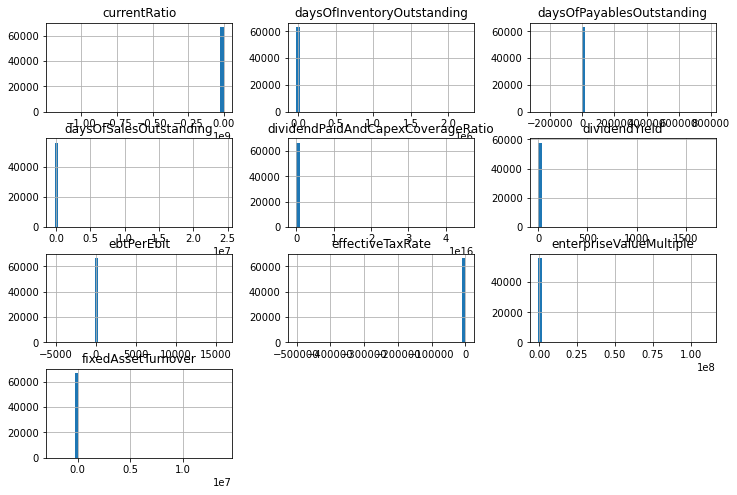

In [5]:
# Note that we find infinite values in slice [40:50]
cols = raw_df.columns
raw_df[cols[10:20]].hist(bins=50, figsize=(12,8))
plt.show()

## Data Cleaning
We first begin by dropping some columns that were used to generate the labels but are thus no longer useful. These include the columns pertaining to stock price, price of the S&P500 and any "internal" ratios of those features. There are also some features that have different names but represent the same thing, such as "cashFlowCoverageRatios" and "cashFlowToDebtRatio". These must also be taken into account and dropped.

In [7]:
redundant = ['stockPriceAverage', 'stockPriceHigh', 'stockPriceLow', 
           'stockPriceRatio_1Q', 'stockPriceRatio_2Q', 'stockPriceRatio_3Q', 
           'stockPriceRatio_4Q', 'S&P500PriceAverage', 'S&P500PriceHigh', 
           'S&P500PriceLow', 'snpPriceRatio_1Q', 'snpPriceRatio_2Q', 
           'snpPriceRatio_3Q', 'snpPriceRatio_4Q']

duplicates = ['cashFlowCoverageRatios', 'priceEarningsRatio']

to_drop = redundant + duplicates

df = raw_df.drop(to_drop, axis=1)
df.describe()

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,...,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital,eps,ebitdaratio,priceRatioRelativeToS&P_1Q,priceRatioRelativeToS&P_2Q,priceRatioRelativeToS&P_3Q,priceRatioRelativeToS&P_4Q
count,66627.000000,66627.000000,4.467600e+04,6.507500e+04,55966.000000,66627.000000,66627.000000,6.662700e+04,6.319700e+04,63197.000000,...,58470.000000,5.592300e+04,5.596600e+04,5.592300e+04,66627.000000,66627.000000,66009.000000,65394.000000,64788.000000,64189.000000
mean,0.018845,-6.441979,8.450875e+01,-8.514182e+01,322.532942,1.660594,10.660023,-2.257592e+04,9.831888e+01,89.433629,...,0.110049,3.141365e+11,8.561235e+02,-6.652229e+12,20.082182,-0.756832,1.003990,1.013372,1.023695,1.034927
std,52.756331,183.857490,7.846092e+03,2.215201e+04,4434.288071,134.812939,1370.541202,4.767032e+06,8.930901e+03,3868.105434,...,21.395610,4.121324e+12,3.479891e+04,1.156646e+15,380.005216,98.852987,0.155289,0.287321,0.395878,0.521533
min,-13567.842499,-18780.000000,-2.741550e+05,-5.650651e+06,-3.839224,-2.291744,-7159.071001,-1.189378e+09,-2.269636e+04,-275647.812389,...,-2001.551202,-5.224308e+11,-1.228120e+05,-2.264398e+17,-30653.000000,-14205.017232,0.106233,0.078548,0.044252,0.035015
25%,0.027859,-3.552239,1.730605e+01,0.000000e+00,0.385121,0.006443,1.415836,1.260512e-03,0.000000e+00,0.000000,...,0.000000,1.098810e+08,2.002852e+00,0.000000e+00,0.074124,0.085565,0.935053,0.895106,0.867468,0.842525
50%,0.128366,-1.140722,5.687928e+01,4.364201e-02,1.513929,0.116823,2.214035,1.213457e+00,2.166779e+01,29.702173,...,0.000000,6.212000e+08,8.209941e+00,1.693000e+08,0.310000,0.165783,0.997658,0.994573,0.991137,0.988077
75%,0.273930,0.000000,9.790742e+01,1.357583e-01,5.016452,0.382347,3.294455,2.039651e+00,6.908198e+01,54.850476,...,0.002170,3.648500e+09,1.916855e+01,9.520500e+08,0.750000,0.364413,1.063024,1.100978,1.129320,1.154034
max,794.861111,16454.666667,1.554834e+06,5.176336e+04,277352.587531,24018.891892,295234.500000,8.486500e+04,2.228760e+06,778042.346939,...,3989.627180,2.726915e+14,8.013799e+06,1.958951e+14,26377.680000,2727.025200,15.513478,35.037254,34.423041,42.343124


### Inputs and Outputs
The data will also be cut into the features (inputs) and the outputs (labels). This is because the label columns intentionally hold NaN values in specific positions. In those cases, the NaN values specifically indicate where the label could not be calculated due to time constraints on the data. We thus do not want to impute those values and we thus cut the data for this processing and then recombine at the end.

In [8]:
label_names = ['priceRatioRelativeToS&P_1Q',
             'priceRatioRelativeToS&P_2Q',
             'priceRatioRelativeToS&P_3Q',
             'priceRatioRelativeToS&P_4Q']
labels_df = df[label_names].copy()
inputs_df = df.drop(label_names, axis=1).copy()

### Infinities
We will now check to find columns with infinite values in the dataset and work to address them.

In [9]:
cols_with_inf = []
for col in inputs_df:
    if np.inf in inputs_df[col].values or -np.inf in inputs_df[col].values:
        cols_with_inf.append(col)
cols_with_inf

['PE_avg', 'PE_low', 'PE_high']

We see that all the PE colums contain infinite values. Since a PE of over 50 is considered high, and that the largest stock market PE in history was around 125, we can safely set these infinite values to a large number to make the calculations feasible. 

In [10]:
replace_values = {np.inf: 10000, -np.inf:-10000}
for col in ['PE_avg', 'PE_low', 'PE_high']:
    inputs_df[col] = inputs_df[col].replace(replace_values)

# Final check for infinite values in the df
for col in inputs_df.columns:
    if np.inf in inputs_df[col].values:
        print('Found an infinite in: ', col)

We have thus cleaned infinite values from the PE columns with appropriate alternatives. 

### NaN Values

There are still however nan values that must be addressed. We now use the preprocessing_tools library to aid with the analysis. First we note that if a particular feature has a large proportion of nan values, then this will inherently be a poor feautre to learn from since a lot of the data will be falsified by imputation. We here choose thise value to be 0.5

In [11]:
inputs_df = drop_nan_columns(inputs_df, threshold=0.5)

In [12]:
cols_with_nan = check_for_nan_columns(inputs_df)

There are two "schemes" of nan values in this dataset:
- Holes in the data that can be seen as holes in a time series. In this case, it would be ideal to take a rolling average around the nan value. This should be the first approach to handling all nan values in the dataset.
    - Care must be taken not to set nan values surrounded with nan values to non-nan values!
- Long strings of nan values in the data. In this case, certain metrics with nan values intuitively can be set to zero. This is typically true for metrics such as dividendYield and payoutRatio, where an absence of a value may indicate the lack of a dividend, and thus a dividend of zero. This should be done second.
- Finally, the data can be inspected again to see what nan values are still present.

We address filling the holes first. First we add a "company" column to group the data by and then proceed with the rolling average.

In [13]:
inputs_df['company'] = inputs_df.index.to_series().apply(lambda x: x.split('-')[0])
companies = (inputs_df['company'].unique())

In [14]:
# ensuring the df is sorted and in order
inputs_df = inputs_df.sort_values(by=['company', 'date'])

# initial number of nan values
print('total nan values: ', inputs_df.isna().sum().sum())

# filling holes
for col in cols_with_nan:
    rolling_average = inputs_df.groupby('company')[col].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean())
    inputs_df[col] = inputs_df[col].fillna(rolling_average)
    
# remaining number of nan values
print('remaining nan values: ', inputs_df.isna().sum().sum())

total nan values:  354050
remaining nan values:  315307


We see that while the method has filled some nan values, it has only addressed around 10% of them. Since the data is inherently time-series data, we now propose to fill future values with the most recent known value on a company-by-company basis. This is known as forward-filling and can be a good imputation method for time-series data. 

In [15]:
# initial number of nan values
print('total nan values: ', inputs_df.isna().sum().sum())

for col in cols_with_nan:
    inputs_df[col] = inputs_df.groupby('company')[col].apply(
    lambda x: x.ffill())
    
# remaining number of nan values
print('remaining nan values: ', inputs_df.isna().sum().sum())

total nan values:  315307
remaining nan values:  277577


We now attempt to interpolate between datapoints using linear interpolation

In [16]:
# initial number of nan values
print('total nan values: ', inputs_df.isna().sum().sum())

for col in cols_with_nan:
    inputs_df[col] = inputs_df.groupby('company')[col].apply(
    lambda x: x.interpolate(method='linear', limit_direction='both'))
    
# remaining number of nan values
print('remaining nan values: ', inputs_df.isna().sum().sum())

total nan values:  277577
remaining nan values:  15436


We see that the interpolation has largely filled in the missing values. The remaining number of nan values is very small when compared to the entire dataset. As such, a final imputation of zero is warranted. Generally, values of zero would be bad for these metrics and thus the model will in effect be penalising the companies. This imputation would thus lead to more false nagetives than false positives, which is the ideal skew in an investment situation.

In [17]:
keys_to_zero = check_for_nan_columns(inputs_df)


# initial number of nan values
print('total nan values: ', inputs_df.isna().sum().sum())

inputs_df[keys_to_zero] = inputs_df[keys_to_zero].fillna(0)

# remaining number of nan values
print('remaining nan values: ', inputs_df.isna().sum().sum())

total nan values:  15436
remaining nan values:  0


The data is thus cleaned of all infinite and nan values. We now recombine the inputs and the labels and then we will save this dataset, noting that it still includes outliers that cause the distribution to look like the histograms presented above.

In [18]:
# cleaned_df
labels_df = labels_df.sort_index()
inputs_df = inputs_df.sort_index()
cleaned_df = pd.merge(inputs_df, labels_df.loc[inputs_df.index],
                       how='outer', left_index=True, right_index=True)
cleaned_df = cleaned_df.sort_values(by=['company', 'date'])

In [19]:
cleaned_df.to_parquet('NYSE_dataset_cleaned_with_outliers.parquet')

## Data Distributions

Now the data distributions can be taken into account and outliers addressed. Looking at the data below, we see that the most agregious values occur below the 2.5th percentile and above the 97.5th percentile.

In [20]:
cleaned_df.describe(percentiles=[0, 0.025, 0.05, 0.95, 0.975, 1.0])

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,...,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital,eps,ebitdaratio,priceRatioRelativeToS&P_1Q,priceRatioRelativeToS&P_2Q,priceRatioRelativeToS&P_3Q,priceRatioRelativeToS&P_4Q
count,66651.000000,66651.000000,6.665100e+04,6.665100e+04,66651.000000,66651.000000,66651.000000,6.665100e+04,6.665100e+04,66651.000000,...,66651.000000,6.665100e+04,6.665100e+04,6.665100e+04,66651.000000,66651.000000,66030.000000,65409.000000,64800.000000,64198.000000
mean,0.018948,-6.440952,6.614730e+01,-8.312445e+01,286.804617,1.660101,10.656360,-2.256779e+04,9.392740e+01,85.646604,...,0.096553,3.016708e+11,7.746112e+02,-5.571125e+12,20.076445,-0.756476,1.004007,1.013397,1.023716,1.034947
std,52.746831,183.824395,6.443796e+03,2.188855e+04,4142.177243,134.788667,1370.294435,4.766174e+06,8.696438e+03,3766.633926,...,20.039557,3.901333e+12,3.191684e+04,1.059481e+15,379.936913,98.835189,0.155279,0.287301,0.395848,0.521500
min,-13567.842499,-18780.000000,-2.741550e+05,-5.650651e+06,-3.839224,-2.291744,-7159.071001,-1.189378e+09,-2.269636e+04,-275647.812389,...,-2001.551202,-5.224308e+11,-1.228120e+05,-2.264398e+17,-30653.000000,-14205.017232,0.106233,0.078548,0.044252,0.035015
0%,-13567.842499,-18780.000000,-2.741550e+05,-5.650651e+06,-3.839224,-2.291744,-7159.071001,-1.189378e+09,-2.269636e+04,-275647.812389,...,-2001.551202,-5.224308e+11,-1.228120e+05,-2.264398e+17,-30653.000000,-14205.017232,0.106233,0.078548,0.044252,0.035015
2.5%,0.000000,-31.774142,-1.995013e+02,-1.436930e-01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,-4.684850e+09,-1.682329e+01,-1.077450e+10,-1.225698,-0.641519,0.757267,0.636287,0.557578,0.498717
5%,0.000000,-16.785527,-9.754546e+01,-5.628596e-02,0.023657,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,-1.579700e+09,-7.374726e+00,-2.486500e+09,-0.410000,-0.086676,0.814628,0.714720,0.646761,0.595307
50%,0.128441,-1.141284,4.509625e+01,4.145170e-02,1.219587,0.116875,2.213496,1.213707e+00,1.742246e+01,27.830302,...,0.000000,6.544310e+08,7.614160e+00,1.490000e+08,0.310000,0.165847,0.997681,0.994574,0.991153,0.988152
95%,0.524808,2.246562,2.226737e+02,6.659044e-01,84.557960,1.654653,10.145678,5.090742e+00,1.585911e+02,160.979361,...,0.012995,3.659200e+10,9.942543e+01,1.112350e+10,4.386764,1.000000,1.205083,1.353417,1.472062,1.576148
97.5%,0.670693,6.832230,3.615645e+02,1.703676e+00,630.924934,3.061025,14.501130,1.026115e+01,2.150287e+02,270.349624,...,0.021348,1.984370e+11,1.425612e+03,4.971190e+10,37.005000,1.000000,1.285490,1.490332,1.667510,1.826591


quickRatio 20 -5
66056


<AxesSubplot:>

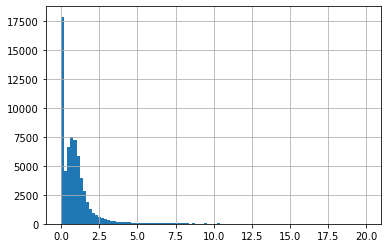

In [136]:
data = {  "quickRatio": [-20, 20],  }
# data = {"bookValuePerShare": [-100, 150],}
string = list(data.keys())[0]
lower = data[string][0]
upper = data[string][1]
print(string, upper, lower)
at = cleaned_df[string]
# at.hist(bins=50)
at_ = at[(at > lower) & (at < upper)]
print(len(at_))
at_.hist(bins=100)
# at_.plot(kind='box')

In [32]:
sum(cleaned_df.daysOfInventoryOutstanding == 0)

28102

In [ ]:
cleaned_df[['cashFlowCoverageRatios', 'cashFlowToDebtRatio']]